In [31]:
#Toxic Comment Classification EDA

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
#Load data in google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
cols = ['target','severe_toxicity','obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit','comment_text']

In [35]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/big-data/train.csv',usecols=cols)
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/big-data/test.csv')

In [36]:
print('%d features and %d records.' % (df_train.shape[1], df_train.shape[0]))
print()
featureColumns = cols
print('Target columns: ' + ', '.join(featureColumns))
df_train.head()

8 features and 1804874 records.

Target columns: target, severe_toxicity, obscene, identity_attack, insult, threat, sexual_explicit, comment_text


,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
0,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,0.0
1,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,0.0
2,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,0.0
3,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,0.0
4,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0


In [37]:
df_targets = df_train[featureColumns].copy()

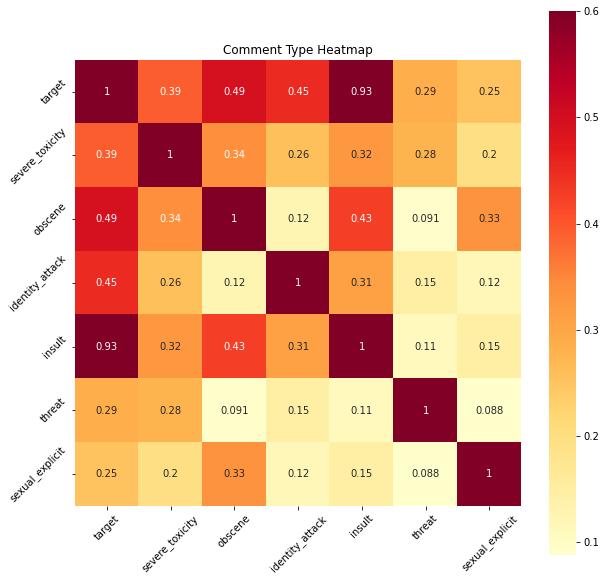

Training Data
=====

291935 out of 1804874 comments, or 16.17%, are classified as toxic.

4406 target comments.

1 severe_toxicity comments.

165 obscene comments.

176 identity_attack comments.

3758 insult comments.

135 threat comments.

42 sexual_explicit comments.


In [38]:
targets = featureColumns[:-1]
toxic_rows = df_targets.sum(axis=1)
toxic_rows = (toxic_rows > 0.5)


count_dic = {}
for comment_type in targets:
    counts = list()
    others = list(targets)
    df_selection = df_targets[(df_targets[comment_type]==1)]
    others.remove(comment_type)
    counts.append(('total', len(df_selection)))
    for other in others:
        counts.append((other, df_selection[other].sum()))
    count_dic[comment_type] = counts


del(df_selection)

def heatmap(df, title):
    plt.figure('heatmap', figsize=[10,10])
    plt.title(title)
    df_corr = df.corr()
    sns.heatmap(df_corr, vmax=0.6, square=True, annot=True, cmap='YlOrRd')
    plt.yticks(rotation = 45)
    plt.xticks(rotation = 45)
    plt.show()

heatmap(df_targets, 'Comment Type Heatmap')


print('Training Data')
print('=====\n')

print('%d out of %d comments, or %.2f%%, are classified as toxic.' % 
     (np.sum(toxic_rows), len(df_train), (np.sum(toxic_rows)/len(df_train))*100))

totals = []
for key, value in count_dic.items():
    totals.append(value[0][1])
    print('\n%d %s comments.' % (value[0][1], key))
  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


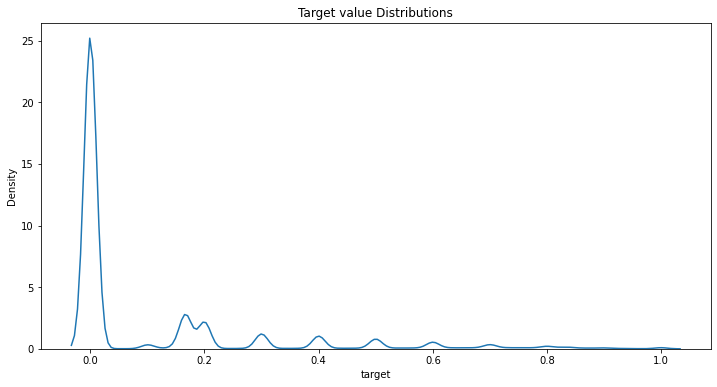

In [39]:
plt.figure(figsize=(12,6))
plt.title("Target value Distributions")
sns.distplot(df_train['target'], kde=True, hist=False, bins=240, label='target')
plt.show()

In [40]:
def get_comment_subtype(row):
    row = [row['severe_toxicity'], row['obscene'], row['identity_attack'], row['insult'], row['threat']]
    maxarg = np.argmax(np.array(row)) 
    if maxarg == 0: return 'severe_toxicity'
    elif maxarg == 1: return 'obscene'
    elif maxarg == 2: return 'identity_attack'
    elif maxarg == 3: return 'insult'
    else: return 'threat'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


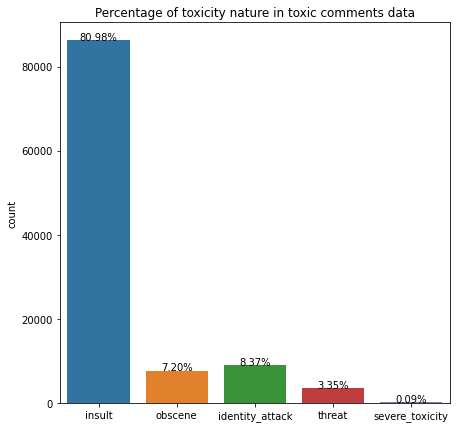

In [41]:
temp = df_train[df_train['target'] > 0.5]
x = temp.apply(get_comment_subtype, axis=1) 
fig, ax = plt.subplots(1,1,figsize=(7,7))
total = float(len(x))

cntplot = sns.countplot(x)
cntplot.set_title('Percentage of toxicity nature in toxic comments data')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
    
plt.show()

In [42]:
comment = df_train['comment_text']
comment_length = np.array([len(comment[i]) for i in range(comment.shape[0])])

In [43]:
print("""The maximum length of comment is:{} 
        \nThe minimum length of the comment is:{} 
        \nAnd the average length of a comment is: {}""".format(comment_length.max(),comment_length.min(),comment_length.mean()))

The maximum length of comment is:1906 
        
The minimum length of the comment is:1 
        
And the average length of a comment is: 297.2343266067327


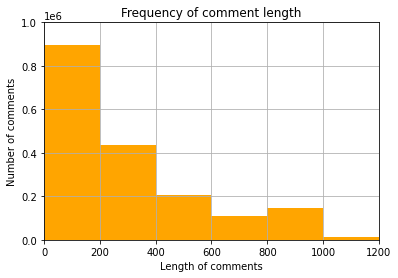

In [44]:
bins = [1,200,400,600,800,1000,1200,1400]
plt.hist(comment_length, bins=bins, color = 'Orange')
plt.title('Frequency of comment length')
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 1000000])
plt.grid(True)
plt.show()